In [10]:
import re
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functools import reduce

In [11]:
df = pd.read_csv("who.csv", sep=",")

In [12]:
df.fillna(0, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df["dt"] = df["Date"] - datetime.datetime(2020,2,1)
df["dt"] = df["dt"].dt.days.astype("int")
#df[df["Country"]=="Spain"].head(60)

In [13]:
# Remove data from 11.05 to 29.05:
df1 = df[df["Date"] < datetime.datetime(2020,5,1)]
df2 = df[(df["Date"] > datetime.datetime(2020,5,9)) & (df["Date"] < datetime.datetime(2020,5,20))]
df3 = df[df["Date"] > datetime.datetime(2020,5,29)]
df = pd.concat([df1,df2,df3])

In [14]:
df.dtypes

Unnamed: 0             int64
Country               object
Conf                   int64
New conf               int64
Deaths                 int64
New deaths           float64
Date          datetime64[ns]
dt                     int64
dtype: object

# Visualization

In [15]:
def sigmoid(x, a, b, c, d):
  return b / (1 + c * np.exp(-d*(x-a)))

[4.19632039e+00 2.33923406e+05 2.01694153e+03 1.26426111e-01]
[5.36020893e+00 2.75228113e+04 1.56213749e+03 1.16468168e-01]
[9.04118301e-01 1.77282686e+05 1.78046373e+03 1.16408036e-01]
[7.71618009e+00 8.54978146e+03 3.19951183e+03 1.13606430e-01]
[8.39120854e-06 8.48257693e+04 3.72826638e-01 4.50854924e-02]
[3.83940220e-01 4.96450145e+03 3.32265333e+00 3.51418507e-02]
[1.67620107e-01 2.29366501e+05 3.63702077e+02 9.30910111e-02]
[1.39520832e-01 3.30708351e+04 5.20143695e+02 9.25670289e-02]


<function matplotlib.pyplot.show(*args, **kw)>

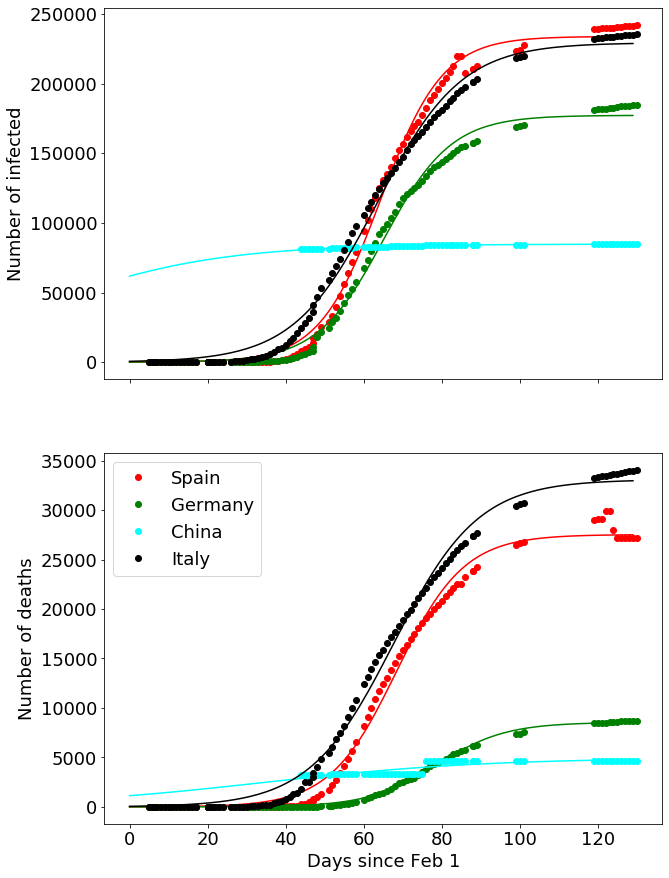

In [16]:
plt.rcParams.update({'font.size': 18})



#df.set_index(["Date"], inplace=True)
df.sort_index(ascending=False, inplace=True)
#countries = ["Spain", "Italy", "Germany", "China", "United States of America", "Republic of Korea"]
countries = ["Spain", "Germany", "China", "Italy"]

colors = ["red", "green", "cyan", "black", "yellow", "pink"]

s = 12
#plt.figure(figsize=(s,s))
fig, ax = plt.subplots(2, 1, sharex='col', sharey=False, figsize=(10,15))


for idx, country in enumerate(countries):
    df1 = df[df['Country'] == country]
    x = df1.loc[:,'dt'].values
    y = df1['Conf'].values#.diff()
    yd = df1.loc[:,'Deaths'].values#.diff()
    ax[0].plot (x,y,'o',label=country, color=colors[idx])
    
    popt, pcov = curve_fit(sigmoid, x, y, bounds=(0, [100, 1000000, 10000, 10]))
    print(popt)
    
    xfit = np.arange(0,np.max(x),1)
    
    ax[0].plot (xfit, sigmoid(xfit, *popt), '-', color=colors[idx])
    #plt.yscale("log")
    ax[1].plot (x,yd,'o',label=country, color=colors[idx])
    
    popt, pcov = curve_fit(sigmoid, x, yd, bounds=(0, [100, 1000000, 10000, 10]))
    print(popt)
    
    #xfit = np.arange(0,100,1)
    
    ax[1].plot (xfit, sigmoid(xfit, *popt), '-', color=colors[idx])
    
plt.xlabel("Days since Feb 1")

ax[0].set_ylabel("Number of infected")
ax[1].set_ylabel("Number of deaths")

plt.legend()
plt.show

In [17]:
# Export results:
today = datetime.date.today().strftime("%d.%m.%Y")
filename = "who-corona-" + today + ".pdf"
print(filename)
fig.savefig(filename)

who-corona-11.06.2020.pdf
